In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [62]:
df = pd.read_csv('house-votes-84.data', header=None, names=['class', 'h-infants', 'wproject-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze', 'el-salvador-aid', 'religious-in-schools', 'anti-satellite', 'aid-to-nicaraguan', 'mx-missile', 'immigration', 'synfuels-cutback', 'education-spending', 'superfund-right-to-sue', 'crime', 'duty-free', 'export-south-africa'])
df.head(3)

class h-infants wproject-cost-sharing  \
0  republican         n                     y   
1  republican         n                     y   
2    democrat         ?                     y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   
1                                 n                    y               y   
2                                 y                    ?               y   

  religious-in-schools anti-satellite aid-to-nicaraguan mx-missile  \
0                    y              n                 n          n   
1                    y              n                 n          n   
2                    y              n                 n          n   

  immigration synfuels-cutback education-spending superfund-right-to-sue  \
0           y                ?                  y                      y   
1           n                n                  y                      y   
2           n                y                  n                      y   

  crime duty-free export-south-africa  
0     y         n                   y  
1     y         n                   ?  
2     y         n                   n

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   class                              435 non-null    object
 1   h-infants                          435 non-null    object
 2   wproject-cost-sharing              435 non-null    object
 3   adoption-of-the-budget-resolution  435 non-null    object
 4   physician-fee-freeze               435 non-null    object
 5   el-salvador-aid                    435 non-null    object
 6   religious-in-schools               435 non-null    object
 7   anti-satellite                     435 non-null    object
 8   aid-to-nicaraguan                  435 non-null    object
 9   mx-missile                         435 non-null    object
 10  immigration                        435 non-null    object
 11  synfuels-cutback                   435 non-null    object
 12  educatio

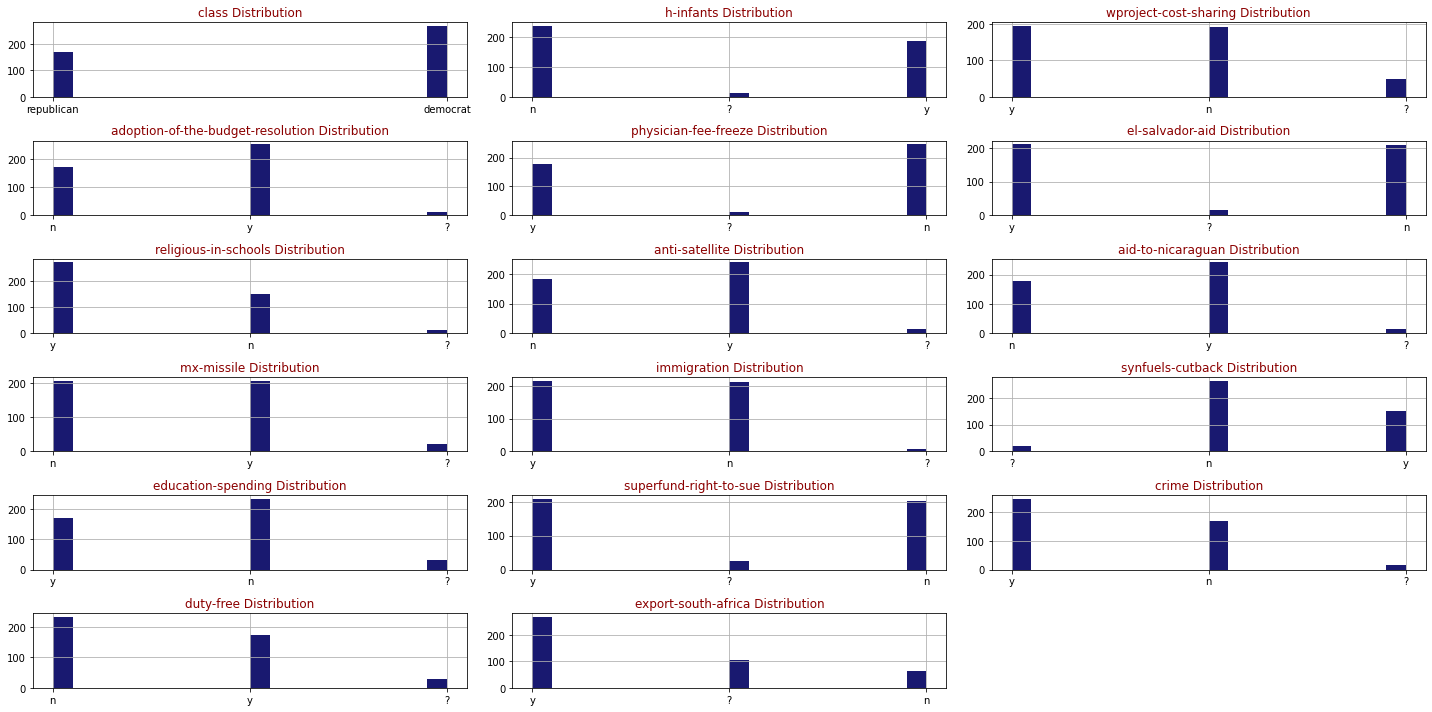

In [21]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,10))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [29]:
# Retirar as colunas contendo '?', perderia muitos dados. Vamos usar a base toda, pois o xgboosting aceita nan

new = df[df != '?']
new.dropna()

class h-infants wproject-cost-sharing  \
5      democrat         n                     y   
8    republican         n                     y   
19     democrat         y                     y   
23     democrat         y                     y   
25     democrat         y                     n   
..          ...       ...                   ...   
423    democrat         n                     y   
426    democrat         y                     n   
427  republican         n                     n   
430  republican         n                     n   
431    democrat         n                     n   

    adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
5                                   y                    n               y   
8                                   n                    y               y   
19                                  y                    n               n   
23                                  y                    n               n   
25                                  y                    n               n   
..                                ...                  ...             ...   
423                                 y                    n               n   
426                                 y                    n               n   
427                                 n                    y               y   
430                                 y                    y               y   
431                                 y                    n               n   

    religious-in-schools anti-satellite aid-to-nicaraguan mx-missile  \
5                      y              n                 n          n   
8                      y              n                 n          n   
19                     n              y                 y          y   
23                     n              y                 y          y   
25                     n              y                 y          y   
..                   ...            ...               ...        ...   
423                    y              y                 y          y   
426                    n              y                 y          y   
427                    y              y                 y          n   
430                    y              n                 n          y   
431                    n              y                 y          y   

    immigration synfuels-cutback education-spending superfund-right-to-sue  \
5             n                n                  n                      y   
8             n                n                  y                      y   
19            n                y                  n                      n   
23            n                n                  n                      n   
25            y                n                  n                      n   
..          ...              ...                ...                    ...   
423           n                y                  n                      n   
426           y                n                  n                      n   
427           y                n                  y                      y   
430           y                n                  y                      y   
431           y                n                  n                      n   

    crime duty-free export-south-africa  
5       y         y                   y  
8       y         n                   y  
19      n         y                   y  
23      n         y                   y  
25      n         y                   y  
..    ...       ...                 ...  
423     y         y                   y  
426     n         y                   y  
427     y         n                   y  
430     y         n                   y  
431     n         n                   y  

[232 rows x 17 columns]

In [63]:
# Substituindo n = o e y =1
df[df == 'n'] = 0
df[df == 'y'] = 1
df = df[df != '?']

In [64]:
df

class h-infants wproject-cost-sharing  \
0    republican         0                     1   
1    republican         0                     1   
2      democrat       NaN                     1   
3      democrat         0                     1   
4      democrat         1                     1   
..          ...       ...                   ...   
430  republican         0                     0   
431    democrat         0                     0   
432  republican         0                   NaN   
433  republican         0                     0   
434  republican         0                     1   

    adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                   0                    1               1   
1                                   0                    1               1   
2                                   1                  NaN               1   
3                                   1                    0             NaN   
4                                   1                    0               1   
..                                ...                  ...             ...   
430                                 1                    1               1   
431                                 1                    0               0   
432                                 0                    1               1   
433                                 0                    1               1   
434                                 0                    1               1   

    religious-in-schools anti-satellite aid-to-nicaraguan mx-missile  \
0                      1              0                 0          0   
1                      1              0                 0          0   
2                      1              0                 0          0   
3                      1              0                 0          0   
4                      1              0                 0          0   
..                   ...            ...               ...        ...   
430                    1              0                 0          1   
431                    0              1                 1          1   
432                    1              0                 0          0   
433                    1            NaN               NaN        NaN   
434                    1              0                 0          0   

    immigration synfuels-cutback education-spending superfund-right-to-sue  \
0             1              NaN                  1                      1   
1             0                0                  1                      1   
2             0                1                  0                      1   
3             0                1                  0                      1   
4             0                1                NaN                      1   
..          ...              ...                ...                    ...   
430           1                0                  1                      1   
431           1                0                  0                      0   
432           0                1                  1                      1   
433         NaN                0                  1                      1   
434           1                0                  1                      1   

    crime duty-free export-south-africa  
0       1         0                   1  
1       1         0                 NaN  
2       1         0                   0  
3       0         0                   1  
4       1         1                   1  
..    ...       ...                 ...  
430     1         0                   1  
431     0         0                   1  
432     1         0                   1  
433     1         0                   1  
434     1       NaN                   0  

[435 rows x 17 columns]

In [72]:
X = df.iloc[:,1:].values
y = df.iloc[:,:1].values

In [73]:
# dividindo em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state = 7)

In [74]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [value for value in y_pred]

In [79]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.42%
